# OCR Model Performance Analysis: Base vs. Custom

This notebook analyzes and compares the performance of a base OCR model against a custom-tuned model. The metrics are loaded from `individual_metrics_realtime.json` (base) and `individual_metrics_realtime_custom_model.json` (custom).

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

def load_and_prepare_data(filepath, model_type):
    """Loads data from a JSON file, adds a model type, and returns a DataFrame."""
    with open(filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)
    df = pd.DataFrame([item for item in data if item and 'cer_percent' in item])
    df['model_type'] = model_type
    return df

# Load data for both models
df_base = load_and_prepare_data('individual_metrics_realtime.json', 'base')
df_custom = load_and_prepare_data('individual_metrics_realtime_custom_model.json', 'custom')

# Combine into a single DataFrame
df_combined = pd.concat([df_base, df_custom], ignore_index=True)

# Display the first few rows with the new model_type column
df_combined.head()

,cer,cer_percent,wer,wer_percent,wer_pythainlp,wer_pythainlp_percent,semantic_similarity,edit_operations,reference_length,hypothesis_length,pythainlp_engine,reference_normalized,hypothesis_normalized,reference_words,hypothesis_words,reference_word_count,hypothesis_word_count,model_type
0,0.384615,38.461538,1.000,100.0,0.500000,50.000000,0.532933,"{'insertions': 0, 'deletions': 0, 'substitutio...",13,11,newmm,ไทยรัฐ TV32HD,ไทยรัฐไฟ 32,"[ไทยรัฐ, TV32HD]","[ไทยรัฐไฟ, 32]",2,2,base
1,0.666667,66.666667,1.000,100.0,1.000000,100.000000,0.709663,"{'insertions': 0, 'deletions': 0, 'substitutio...",15,10,newmm,ไทยรัฐนิวส์โชว์,นิทธยรัชว์,[ไทยรัฐนิวส์โชว์],[นิทธยรัชว์],1,1,base
2,0.666667,66.666667,1.000,100.0,0.888889,88.888889,0.461325,"{'insertions': 0, 'deletions': 1, 'substitutio...",30,14,newmm,เพยน ผลอุดสาห์คนสนิทกับเจ๊น้อย,เพิยนผิลอุดสาห,"[เพยน, ผลอุดสาห์คนสนิทกับเจ๊น้อย]",[เพิยนผิลอุดสาห],2,1,base
3,0.833333,83.333333,1.000,100.0,1.000000,100.000000,0.506274,"{'insertions': 0, 'deletions': 2, 'substitutio...",54,35,newmm,ดูไทยรัฐนิวส์โชว์ทุกวัน ข่าวสนุก พิธีกรน่ารักม...,กำลังชมข่าวไทยรัฐนิวสโชวครับ/ลุงลอง,"[ดูไทยรัฐนิวส์โชว์ทุกวัน, ข่าวสนุก, พิธีกรน่าร...",[กำลังชมข่าวไทยรัฐนิวสโชวครับ/ลุงลอง],3,1,base
4,0.071429,7.142857,0.375,37.5,0.384615,38.461538,0.958802,"{'insertions': 0, 'deletions': 0, 'substitutio...",56,55,newmm,ชูวิทย์ เปิด หฐ. แถลงข่าว 3 แสน เตรียมฟ้องหมิ่...,ชูวิทย์ เปิด หฐ. แกลงข่าว 3 แสน เตรียมฟ้องหมื่...,"[ชูวิทย์, เปิด, หฐ., แถลงข่าว, 3, แสน, เตรียมฟ...","[ชูวิทย์, เปิด, หฐ., แกลงข่าว, 3, แสน, เตรียมฟ...",8,8,base


## Comparative Distribution of Metrics

Let's visualize the distribution of the key metrics for both models side-by-side using box plots. This provides a clear comparison of their performance and consistency.

/var/folders/pk/1kk1p7fn0fvcz97rbszctb7w0000gn/T/ipykernel_12318/45670515.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/pk/1kk1p7fn0fvcz97rbszctb7w0000gn/T/ipykernel_12318/45670515.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/pk/1kk1p7fn0fvcz97rbszctb7w0000gn/T/ipykernel_12318/45670515.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




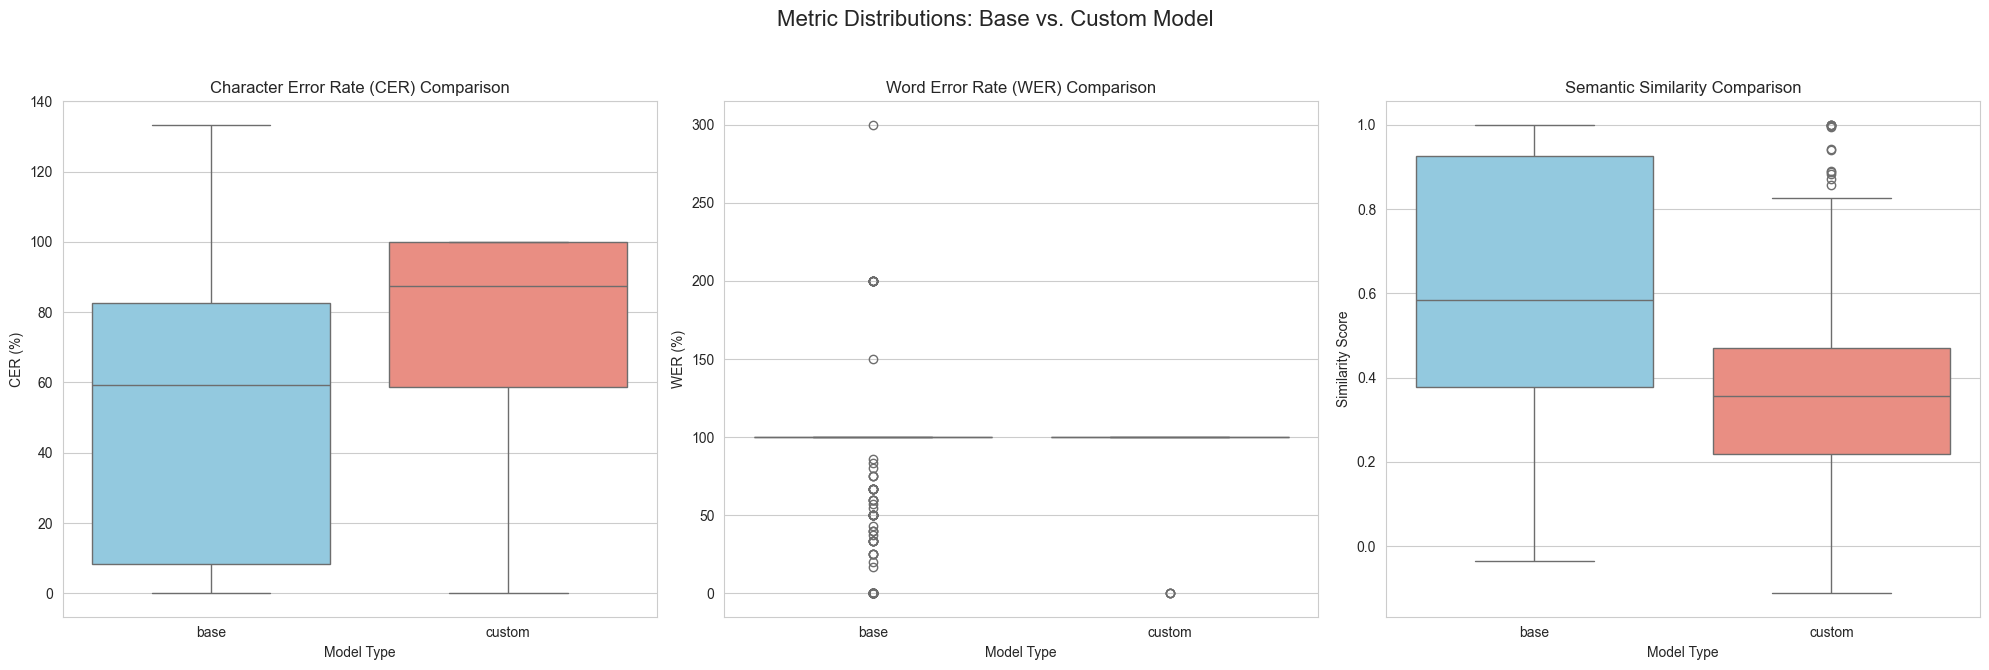

In [30]:
# Set the style for the plots
sns.set_style("whitegrid")
palette = {"base": "skyblue", "custom": "salmon"}

# Create a figure for the box plots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Metric Distributions: Base vs. Custom Model', fontsize=16)

# 1. Character Error Rate (CER) Comparison
sns.boxplot(data=df_combined, x='model_type', y='cer_percent', ax=axes[0], palette=palette)
axes[0].set_title('Character Error Rate (CER) Comparison')
axes[0].set_xlabel('Model Type')
axes[0].set_ylabel('CER (%)')

# 2. Word Error Rate (WER) Comparison
sns.boxplot(data=df_combined, x='model_type', y='wer_percent', ax=axes[1], palette=palette)
axes[1].set_title('Word Error Rate (WER) Comparison')
axes[1].set_xlabel('Model Type')
axes[1].set_ylabel('WER (%)')

# 3. Semantic Similarity Comparison
sns.boxplot(data=df_combined, x='model_type', y='semantic_similarity', ax=axes[2], palette=palette)
axes[2].set_title('Semantic Similarity Comparison')
axes[2].set_xlabel('Model Type')
axes[2].set_ylabel('Similarity Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Comparative Relationship between Metrics

Let's see how the relationship between metrics differs across the two models.

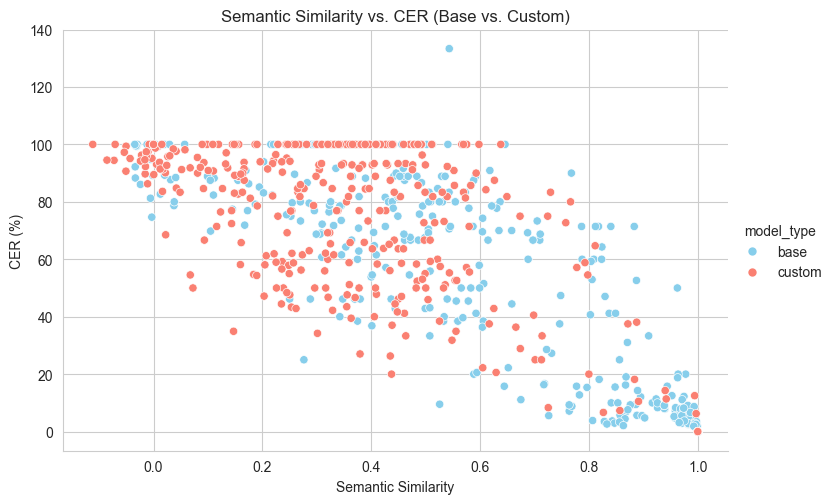

In [31]:
# Scatter plot of Semantic Similarity vs. Character Error Rate for both models
sns.relplot(data=df_combined, x='semantic_similarity', y='cer_percent', hue='model_type', palette=palette, aspect=1.5)
plt.title('Semantic Similarity vs. CER (Base vs. Custom)')
plt.xlabel('Semantic Similarity')
plt.ylabel('CER (%)')
plt.grid(True)
plt.show()

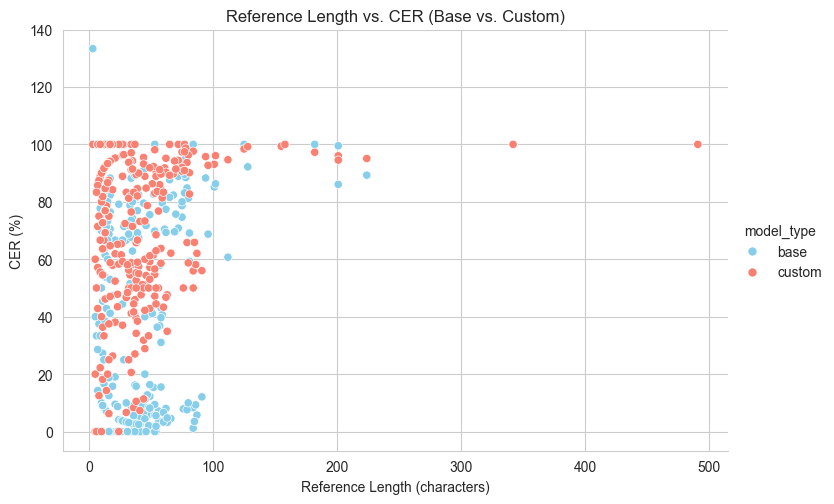

In [32]:
# Scatter plot of Reference Length vs. Character Error Rate for both models
sns.relplot(data=df_combined, x='reference_length', y='cer_percent', hue='model_type', palette=palette, aspect=1.5)
plt.title('Reference Length vs. CER (Base vs. Custom)')
plt.xlabel('Reference Length (characters)')
plt.ylabel('CER (%)')
plt.grid(True)
plt.show()

### Comparative Correlation Analysis

Let's look at the correlation matrices for each model separately.

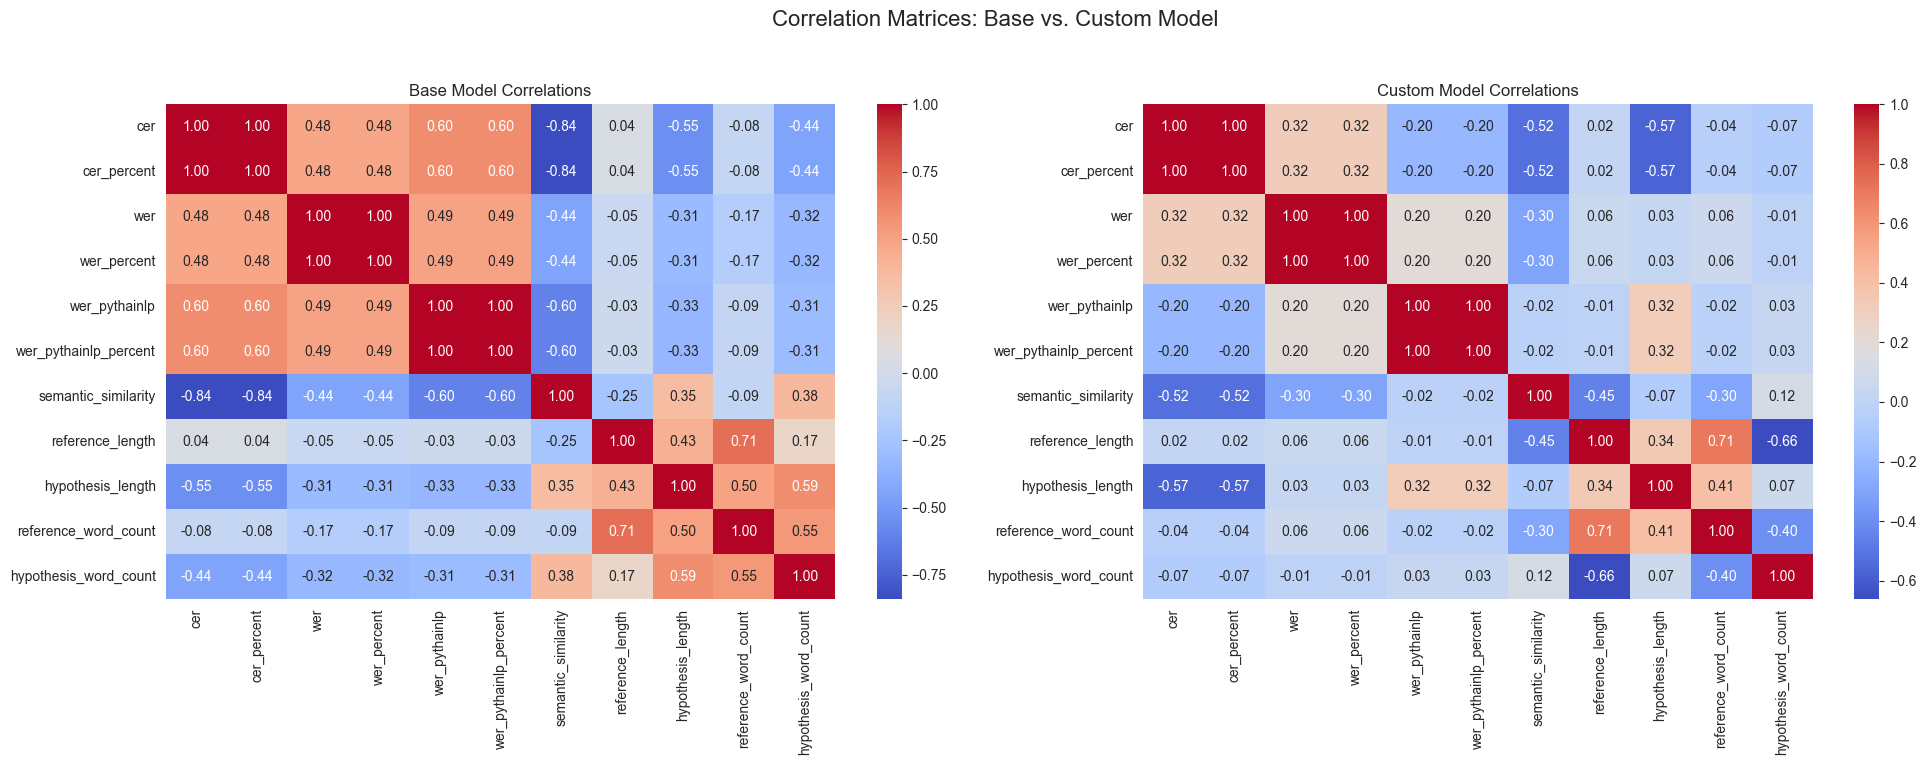

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Correlation Matrices: Base vs. Custom Model', fontsize=16)

# Base Model Correlation
numeric_cols_base = df_base.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_base = df_base[numeric_cols_base].corr()
sns.heatmap(correlation_matrix_base, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Base Model Correlations')

# Custom Model Correlation
numeric_cols_custom = df_custom.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_custom = df_custom[numeric_cols_custom].corr()
sns.heatmap(correlation_matrix_custom, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Custom Model Correlations')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Comparative Error Analysis: Worst and Best Cases

By examining the extreme cases for both models, we can see if the custom model improves on the base model's weaknesses.

In [34]:
# Display top 10 worst cases for each model
print("--- Top 10 Worst Predictions for Base Model ---")
display(df_base.sort_values(by='cer_percent', ascending=False).head(10)[['reference_normalized', 'hypothesis_normalized', 'cer_percent']])
print("\n--- Top 10 Worst Predictions for Custom Model ---")
display(df_custom.sort_values(by='cer_percent', ascending=False).head(10)[['reference_normalized', 'hypothesis_normalized', 'cer_percent']])

--- Top 10 Worst Predictions for Base Model ---


,reference_normalized,hypothesis_normalized,cer_percent
348,3HD,qq-d,133.333333
313,pptv hd36 live,วิธํ,100.000000
144,TNNEARTH,arfh,100.000000
140,UNCTAD,unctad,100.000000
286,pptvhd36live,eฐ,100.000000
289,pptvhd36live,eฮ,100.000000
128,7HDlive,อู,100.000000
309,tnn16live,,100.000000
97,3HDlive,อ)=3,100.000000
88,pptvhd36live,es,100.000000



--- Top 10 Worst Predictions for Custom Model ---


,reference_normalized,hypothesis_normalized,cer_percent
376,ข่าวสโมสี,ย:ฐ,100.0
131,มาตรฐานมาครบคุณภาพมาคุ้มผลผลิตมาชัวร์,:สฒ',100.0
304,ไทยเป็นอันดับของโลก,..รวตส,100.0
121,ข่าวเย็นช่องวัน,:ถม,100.0
126,ข่าวเที่ยงช่องวัน,B8แ:u,100.0
295,ข่าวเย็นช่องวัน,tมมี,100.0
128,7HDlive,9:,100.0
129,สนามข่าว,ิิว.ต,100.0
135,pptvhd36live,Eย,100.0
113,3HDlive,8:,100.0


### Best Predictions (Perfect Score)

These are examples where the model achieved a perfect score (0% CER), indicating it can handle these types of inputs well.

In [35]:
# Display top 10 best cases for each model
print("--- Top 10 Best Predictions for Base Model (CER = 0) ---")
display(df_base[df_base['cer_percent'] == 0].head(10)[['reference_normalized', 'hypothesis_normalized', 'cer_percent']])
print("\n--- Top 10 Best Predictions for Custom Model (CER = 0) ---")
display(df_custom[df_custom['cer_percent'] == 0].head(10)[['reference_normalized', 'hypothesis_normalized', 'cer_percent']])

--- Top 10 Best Predictions for Base Model (CER = 0) ---


,reference_normalized,hypothesis_normalized,cer_percent
23,กองทัพไทยส่งกำลังพล 55 นายช่วยเมียนมา,กองทัพไทยส่งกำลังพล 55 นายช่วยเมียนมา,0.0
32,สัมภาษณ์ทางโทรศัพท์,สัมภาษณ์ทางโทรศัพท์,0.0
33,เชื่อใจก่อนนะครับหลายรอบ,เชื่อใจก่อนนะครับหลายรอบ,0.0
44,สนามบินน้ำร้อนมากครับเมืองนนทบุรี,สนามบินน้ำร้อนมากครับเมืองนนทบุรี,0.0
74,ที่มา : กรมป้องกันและบรรเทาสาธารณภัย,ที่มา : กรมป้องกันและบรรเทาสาธารณภัย,0.0
101,สงกรานต์รักสิ่งแวดล้อม 2 จังหวัด,สงกรานต์รักสิ่งแวดล้อม 2 จังหวัด,0.0
106,02-113-2222,02-113-2222,0.0
116,ซื้อ 4 กระปุก ฟรี 3 กระปุก,ซื้อ 4 กระปุก ฟรี 3 กระปุก,0.0
136,ธุรกิจตั้งใหม่ 11 เดือน ปี 67 ส่งสัญญาณบวก,ธุรกิจตั้งใหม่ 11 เดือน ปี 67 ส่งสัญญาณบวก,0.0
147,workpoint,workpoint,0.0



--- Top 10 Best Predictions for Custom Model (CER = 0) ---


,reference_normalized,hypothesis_normalized,cer_percent
33,เชื่อใจก่อนนะครับหลายรอบ,เชื่อใจก่อนนะครับหลายรอบ,0.0
108,ลำปาง,ลำปาง,0.0
140,UNCTAD,UNCTAD,0.0
302,บัตรเครดิต,บัตรเครดิต,0.0


## Performance Summary: Base vs Custom Model

Let's compare the overall performance statistics to see if the custom model performs better than the base model.

In [36]:
# Calculate summary statistics for both models
base_stats = {
    'CER Mean (%)': df_base['cer_percent'].mean(),
    'CER Median (%)': df_base['cer_percent'].median(),
    'CER Std (%)': df_base['cer_percent'].std(),
    'WER Mean (%)': df_base['wer_percent'].mean(),
    'WER Median (%)': df_base['wer_percent'].median(),
    'Semantic Similarity Mean': df_base['semantic_similarity'].mean(),
    'Perfect Predictions (CER=0)': len(df_base[df_base['cer_percent'] == 0]),
    'Total Samples': len(df_base)
}

custom_stats = {
    'CER Mean (%)': df_custom['cer_percent'].mean(),
    'CER Median (%)': df_custom['cer_percent'].median(),
    'CER Std (%)': df_custom['cer_percent'].std(),
    'WER Mean (%)': df_custom['wer_percent'].mean(),
    'WER Median (%)': df_custom['wer_percent'].median(),
    'Semantic Similarity Mean': df_custom['semantic_similarity'].mean(),
    'Perfect Predictions (CER=0)': len(df_custom[df_custom['cer_percent'] == 0]),
    'Total Samples': len(df_custom)
}

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Base Model': base_stats,
    'Custom Model': custom_stats
})

# Calculate improvement
comparison_df['Improvement'] = ((comparison_df['Base Model'] - comparison_df['Custom Model']) / comparison_df['Base Model'] * 100).round(2)

# For metrics where higher is better (Semantic Similarity, Perfect Predictions), reverse the calculation
for metric in ['Semantic Similarity Mean', 'Perfect Predictions (CER=0)']:
    if metric in comparison_df.index:
        comparison_df.loc[metric, 'Improvement'] = ((comparison_df.loc[metric, 'Custom Model'] - comparison_df.loc[metric, 'Base Model']) / comparison_df.loc[metric, 'Base Model'] * 100).round(2)

display(comparison_df)

,Base Model,Custom Model,Improvement
CER Mean (%),49.932379,77.177469,-54.56
CER Median (%),59.259259,87.500000,-47.66
CER Std (%),37.286231,25.228857,32.34
WER Mean (%),87.124915,98.938992,-13.56
WER Median (%),100.000000,100.000000,0.00
Semantic Similarity Mean,0.608421,0.352494,-42.06
Perfect Predictions (CER=0),38.000000,4.000000,-89.47
Total Samples,377.000000,377.000000,0.00


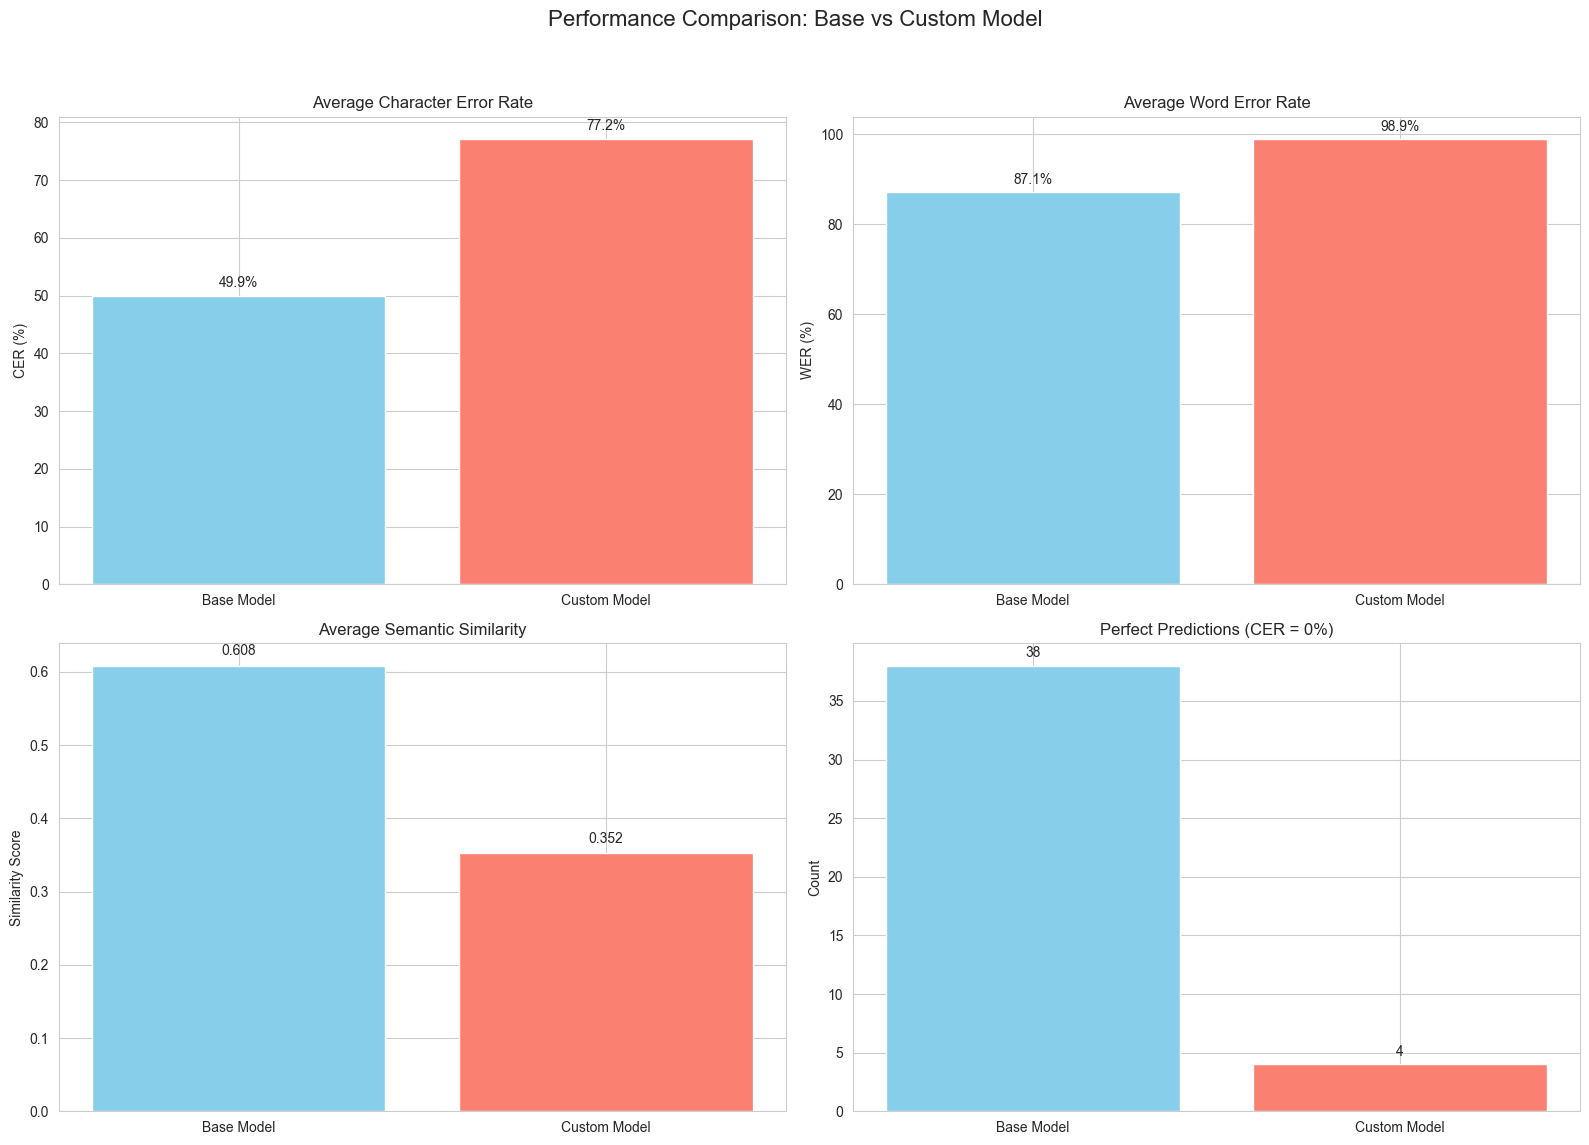

In [37]:
# Create bar plots for key metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Performance Comparison: Base vs Custom Model', fontsize=16)

# 1. CER Mean Comparison
metrics_to_plot = ['CER Mean (%)', 'WER Mean (%)', 'Semantic Similarity Mean']
colors = ['skyblue', 'salmon']

# CER Mean
cer_data = [base_stats['CER Mean (%)'], custom_stats['CER Mean (%)']]
axes[0, 0].bar(['Base Model', 'Custom Model'], cer_data, color=colors)
axes[0, 0].set_title('Average Character Error Rate')
axes[0, 0].set_ylabel('CER (%)')
for i, v in enumerate(cer_data):
    axes[0, 0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# WER Mean
wer_data = [base_stats['WER Mean (%)'], custom_stats['WER Mean (%)']]
axes[0, 1].bar(['Base Model', 'Custom Model'], wer_data, color=colors)
axes[0, 1].set_title('Average Word Error Rate')
axes[0, 1].set_ylabel('WER (%)')
for i, v in enumerate(wer_data):
    axes[0, 1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Semantic Similarity Mean
semantic_data = [base_stats['Semantic Similarity Mean'], custom_stats['Semantic Similarity Mean']]
axes[1, 0].bar(['Base Model', 'Custom Model'], semantic_data, color=colors)
axes[1, 0].set_title('Average Semantic Similarity')
axes[1, 0].set_ylabel('Similarity Score')
for i, v in enumerate(semantic_data):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Perfect Predictions Count
perfect_data = [base_stats['Perfect Predictions (CER=0)'], custom_stats['Perfect Predictions (CER=0)']]
axes[1, 1].bar(['Base Model', 'Custom Model'], perfect_data, color=colors)
axes[1, 1].set_title('Perfect Predictions (CER = 0%)')
axes[1, 1].set_ylabel('Count')
for i, v in enumerate(perfect_data):
    axes[1, 1].text(i, v + 0.5, f'{v}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

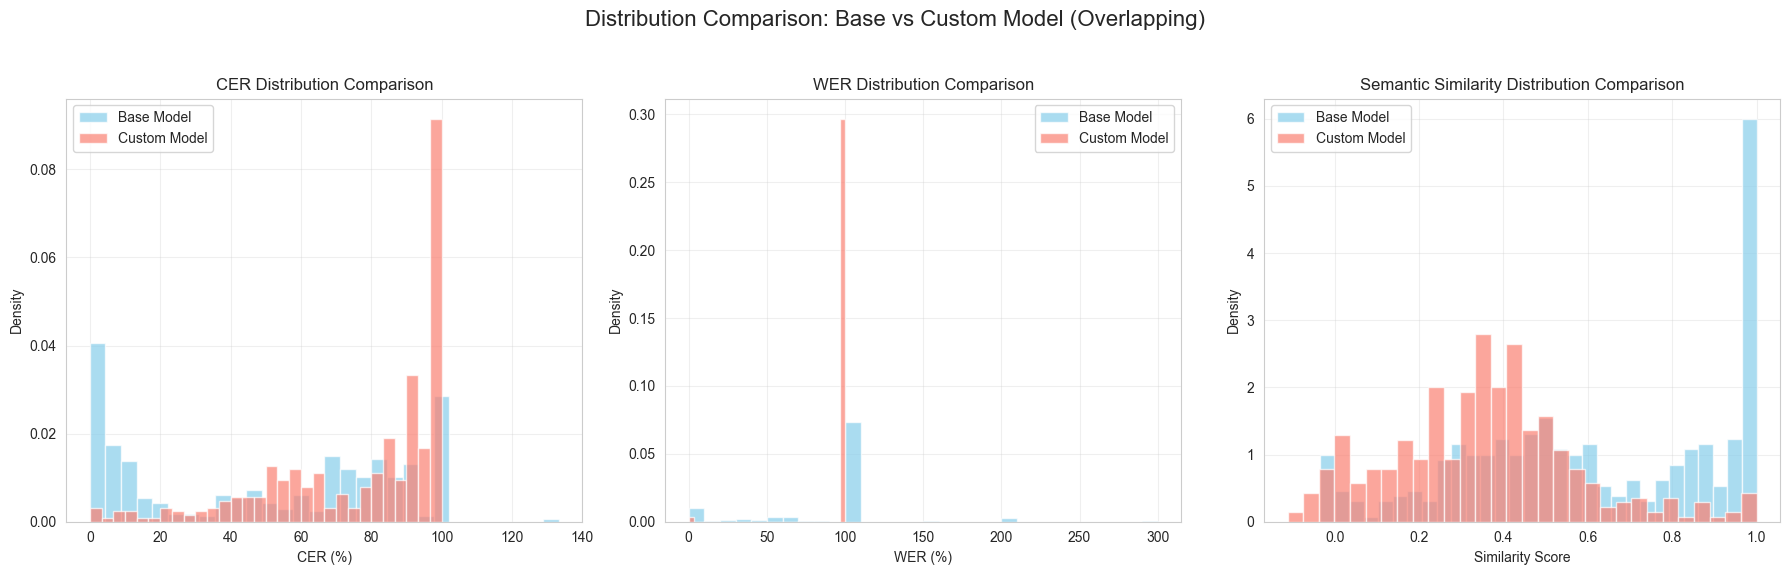

In [38]:
# Create overlapping histograms for direct comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution Comparison: Base vs Custom Model (Overlapping)', fontsize=16)

# CER Distribution Overlay
axes[0].hist(df_base['cer_percent'], bins=30, alpha=0.7, label='Base Model', color='skyblue', density=True)
axes[0].hist(df_custom['cer_percent'], bins=30, alpha=0.7, label='Custom Model', color='salmon', density=True)
axes[0].set_title('CER Distribution Comparison')
axes[0].set_xlabel('CER (%)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# WER Distribution Overlay
axes[1].hist(df_base['wer_percent'], bins=30, alpha=0.7, label='Base Model', color='skyblue', density=True)
axes[1].hist(df_custom['wer_percent'], bins=30, alpha=0.7, label='Custom Model', color='salmon', density=True)
axes[1].set_title('WER Distribution Comparison')
axes[1].set_xlabel('WER (%)')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Semantic Similarity Distribution Overlay
axes[2].hist(df_base['semantic_similarity'], bins=30, alpha=0.7, label='Base Model', color='skyblue', density=True)
axes[2].hist(df_custom['semantic_similarity'], bins=30, alpha=0.7, label='Custom Model', color='salmon', density=True)
axes[2].set_title('Semantic Similarity Distribution Comparison')
axes[2].set_xlabel('Similarity Score')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()